<a href="https://colab.research.google.com/github/flowergum/Colorization/blob/main/Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, \
                                    Dense, \
                                    MaxPool2D,\
                                    Dropout, \
                                    Flatten, \
                                    BatchNormalization, InputLayer, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def processed_image(img):
  image = img.resize( (128, 128), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [3]:
img = Image.open('drive/MyDrive/Colorization/Step_1.Small_dataset/color/1.jpg')
X, Y, size = processed_image(img)
print(X.shape, '     ', Y.shape)

(1, 128, 128, 1)       (1, 128, 128, 2)


In [4]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [5]:
model.compile(optimizer='adam', loss='mse')


In [6]:
model.fit(x=X, y=Y, batch_size=1, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.1327
Epoch 2/100
1/1 [==============================] - 0s 299ms/step - loss: 0.4972
Epoch 3/100
1/1 [==============================] - 0s 281ms/step - loss: 0.3527
Epoch 4/100
1/1 [==============================] - 0s 301ms/step - loss: 0.0991
Epoch 5/100
1/1 [==============================] - 0s 317ms/step - loss: 0.0594
Epoch 6/100
1/1 [==============================] - 0s 320ms/step - loss: 0.0604
Epoch 7/100
1/1 [==============================] - 0s 326ms/step - loss: 0.0578
Epoch 8/100
1/1 [==============================] - 0s 311ms/step - loss: 0.0534
Epoch 9/100
1/1 [==============================] - 0s 283ms/step - loss: 0.0470
Epoch 10/100
1/1 [==============================] - 0s 294ms/step - loss: 0.0510
Epoch 11/100
1/1 [==============================] - 0s 288ms/step - loss: 0.0374
Epoch 12/100
1/1 [==============================] - 0s 285ms/step - loss: 0.1668
Epoch 13/100
1/1 [======================

In [7]:
X, Y, size = processed_image(img)

In [8]:
output = model.predict(X)

In [9]:
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

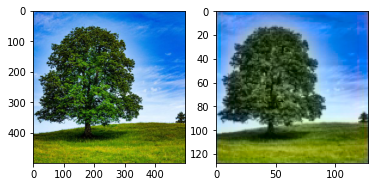

In [10]:
cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))